In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings

warnings.filterwarnings('ignore')




In [57]:
file_path = "../resources/data/output/online_retail_cleaned.csv"   
df = pd.read_csv(file_path)
print(df.head())
print(df.isnull().sum())


   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  Year  Month  \
0  2010-01-12 08:26:00       2.55     17850.0  United Kingdom  2010      1   
1  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010      1   
2  2010-01-12 08:26:00       2.75     17850.0  United Kingdom  2010      1   
3  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010      1   
4  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010      1   

   Day  
0   12  
1   12  
2   12  
3   12  
4   12  
InvoiceNo      0
StockCode      0
Desc

In [58]:
def summary(df):
    display(df.head())
    print('-'*100)
    display(df.info())
    print('-'*100)
    display(df.describe([0.01,0.25,0.50,0.75,0.99]))
summary(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392732 entries, 0 to 392731
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  int64  
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
 8   Year         392732 non-null  int64  
 9   Month        392732 non-null  int64  
 10  Day          392732 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 33.0+ MB


None

----------------------------------------------------------------------------------------------------


,InvoiceNo,Quantity,UnitPrice,CustomerID,Year,Month,Day
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,560591.072436,13.153718,3.125596,15287.734822,2010.934630,6.942118,15.704468
std,13087.116747,181.588420,22.240725,1713.567773,0.247178,3.328213,8.047342
min,536365.000000,1.000000,0.000000,12346.000000,2010.000000,1.000000,1.000000
1%,536856.000000,1.000000,0.210000,12415.000000,2010.000000,1.000000,1.000000
25%,549234.000000,2.000000,1.250000,13955.000000,2011.000000,4.000000,10.000000
50%,561874.000000,6.000000,1.950000,15150.000000,2011.000000,7.000000,15.000000
75%,572061.000000,12.000000,3.750000,16791.000000,2011.000000,10.000000,22.000000
99%,581147.000000,120.000000,14.950000,18211.000000,2011.000000,12.000000,31.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,2011.000000,12.000000,31.000000


**Descriptive Statistics**

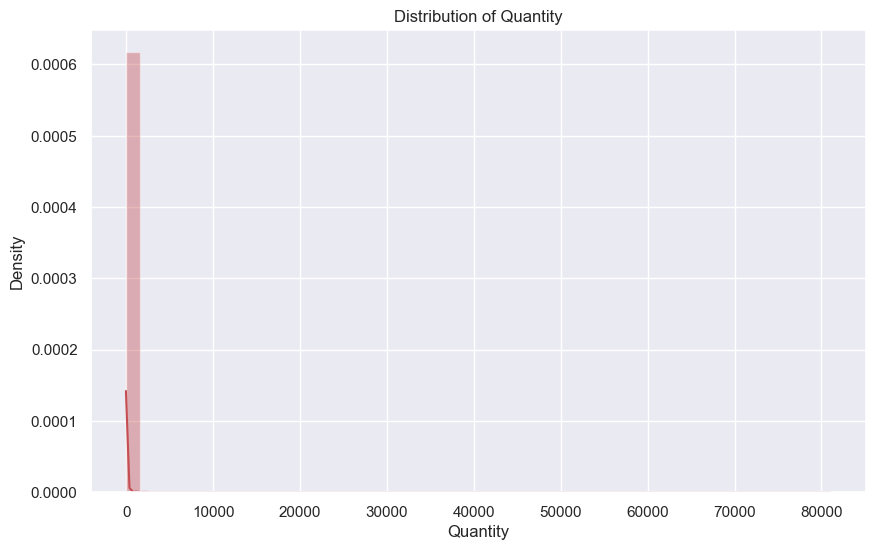

In [59]:
# Since the data is clean, we can proceed with the analysis
# Let's first check the distribution of the target variable 'Quantity'
plt.figure(figsize=(10,6))
sns.distplot(df['Quantity'], color='r')
plt.title('Distribution of Quantity')
plt.show()

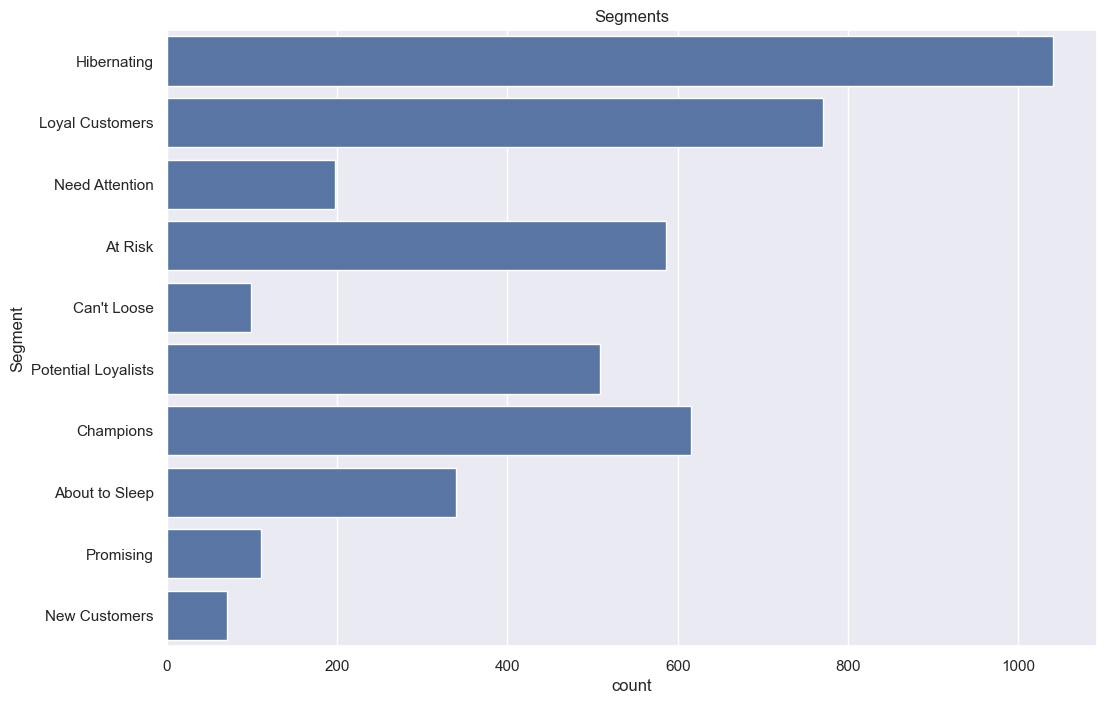

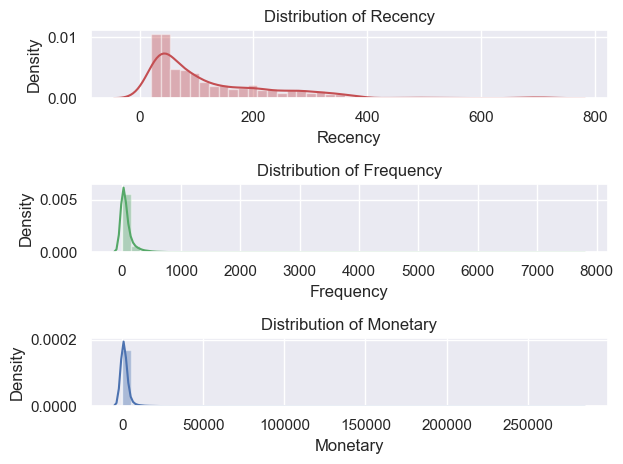

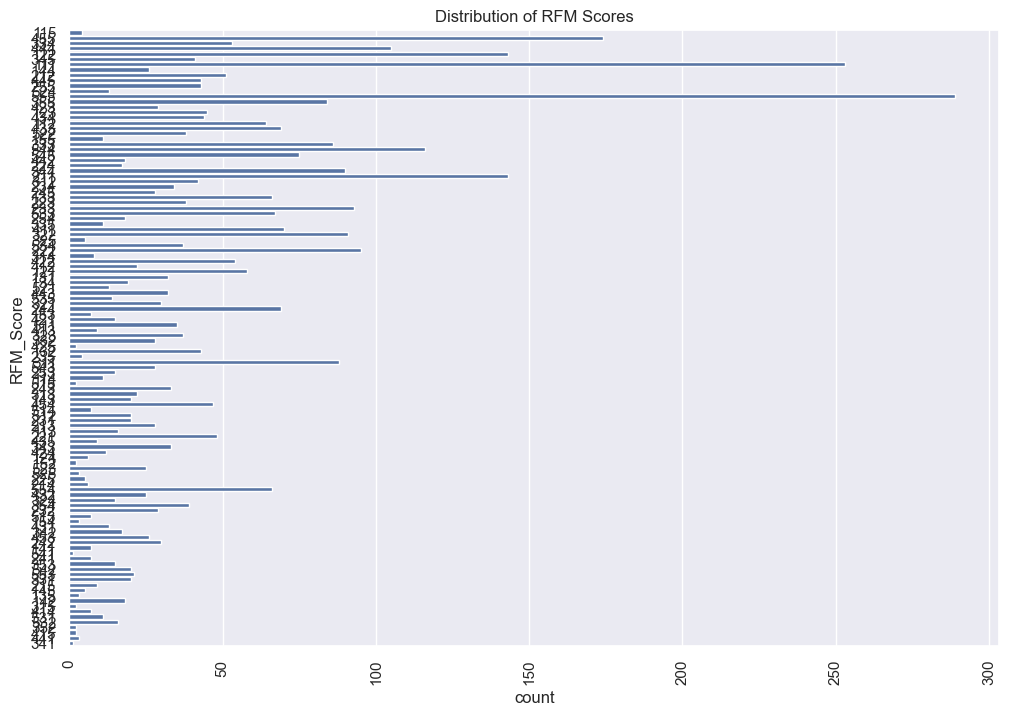

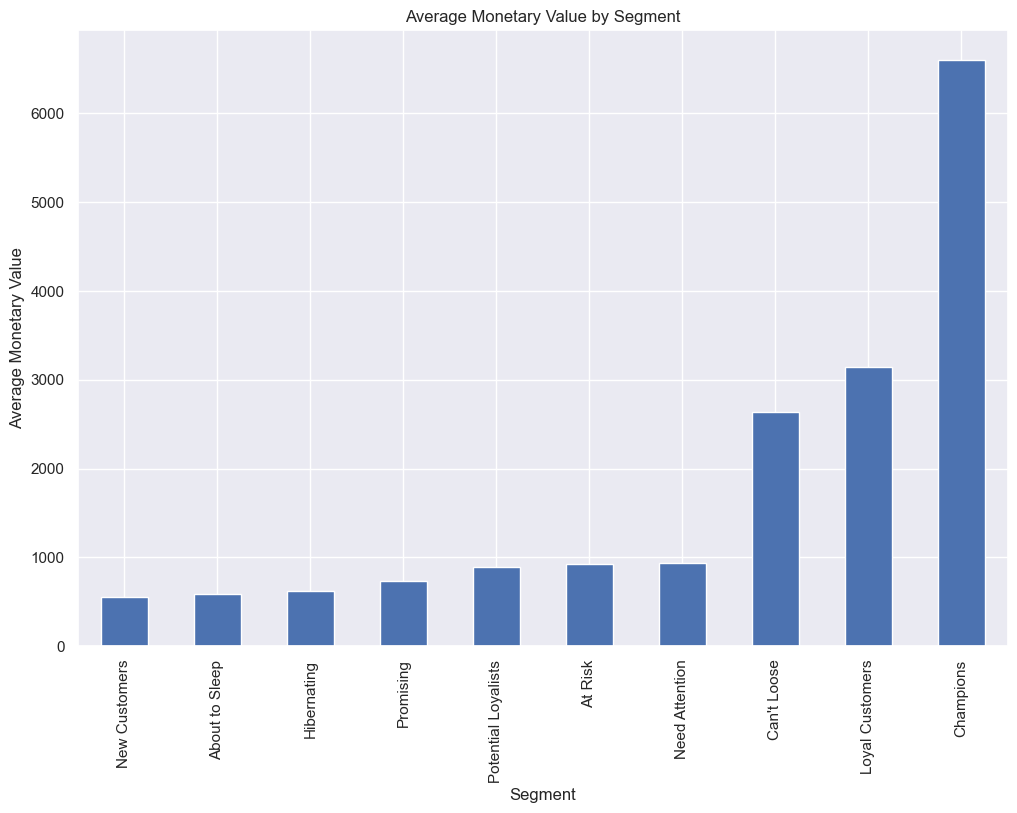

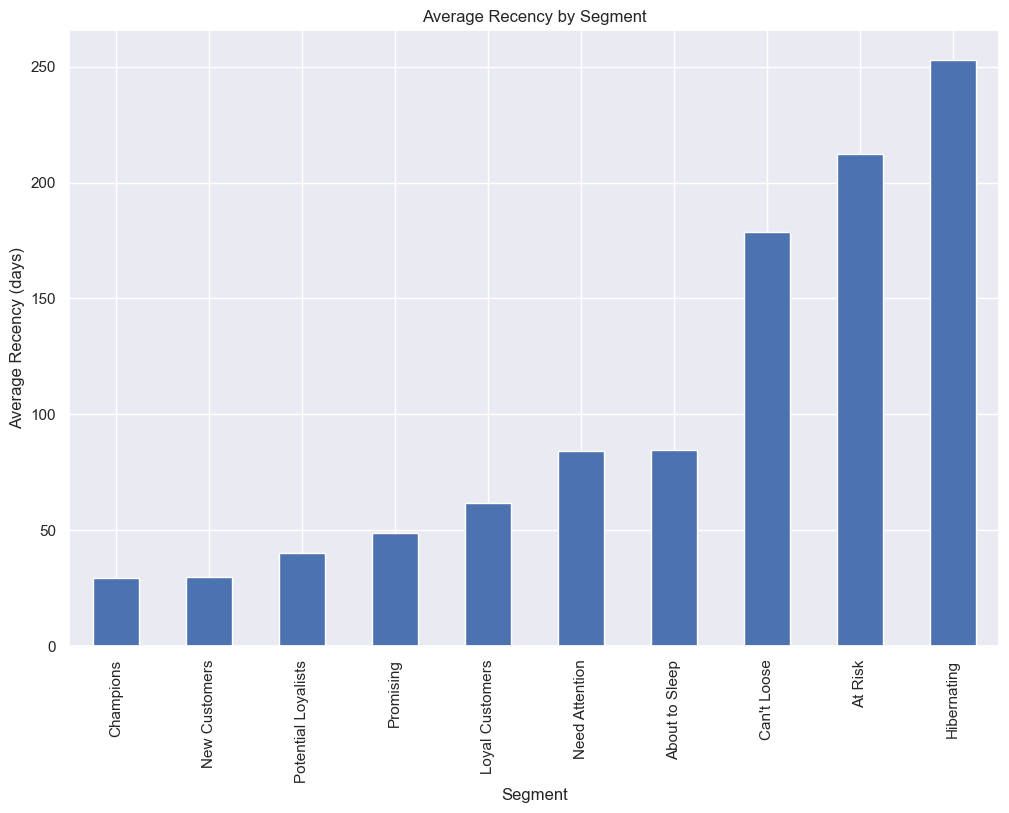

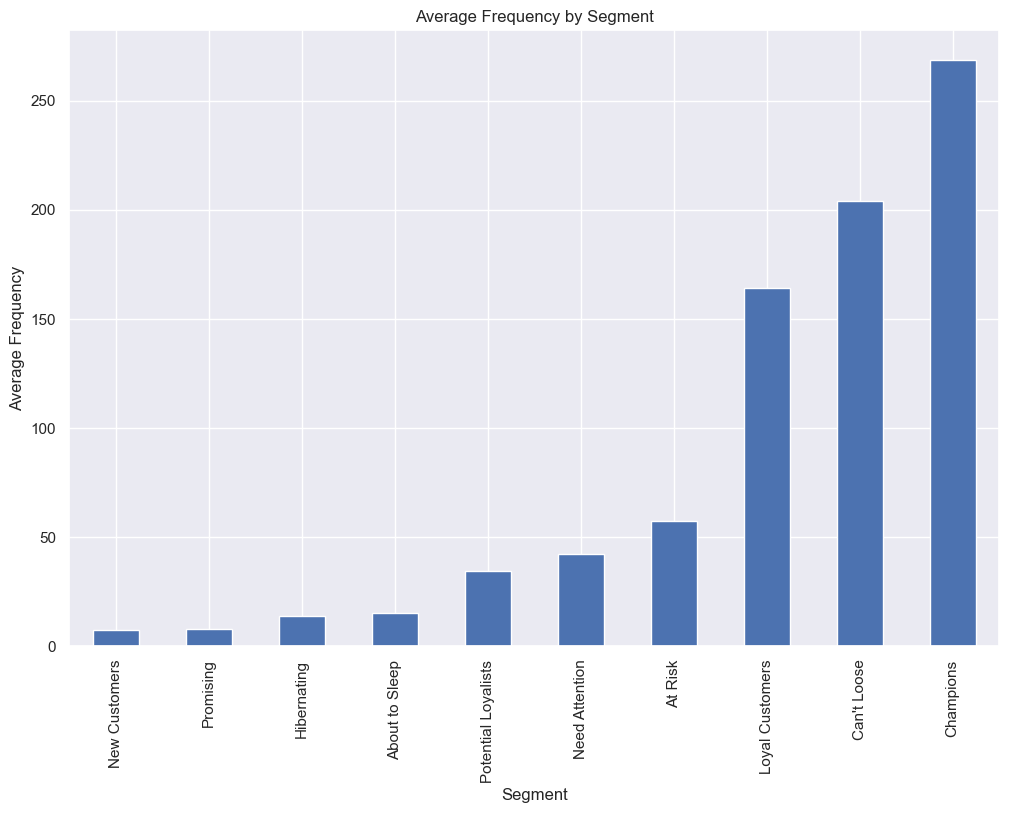

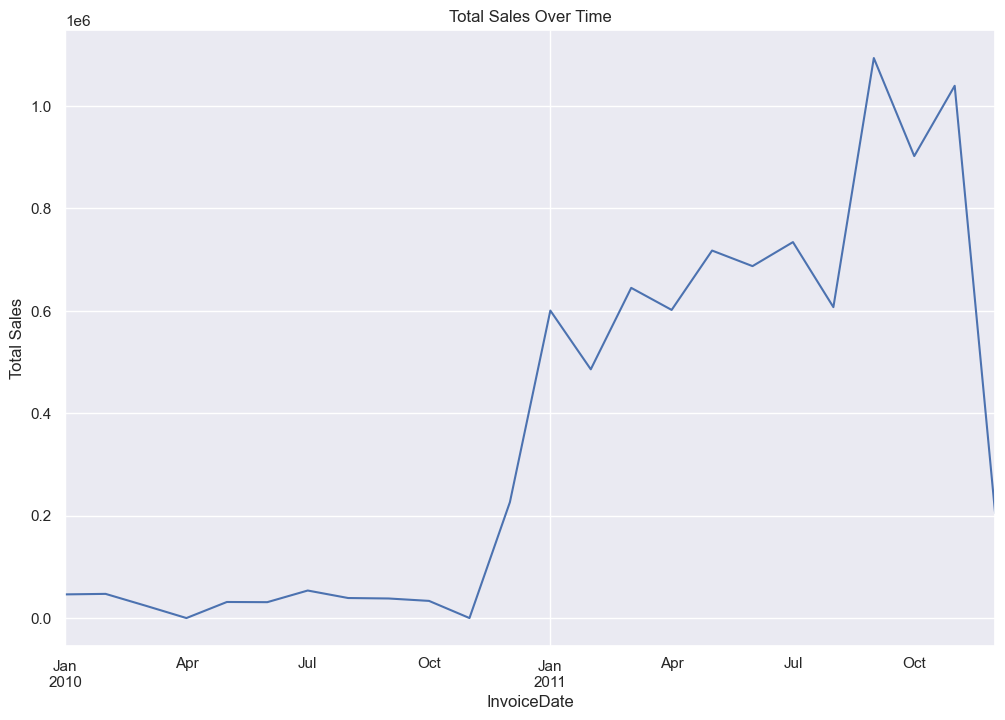

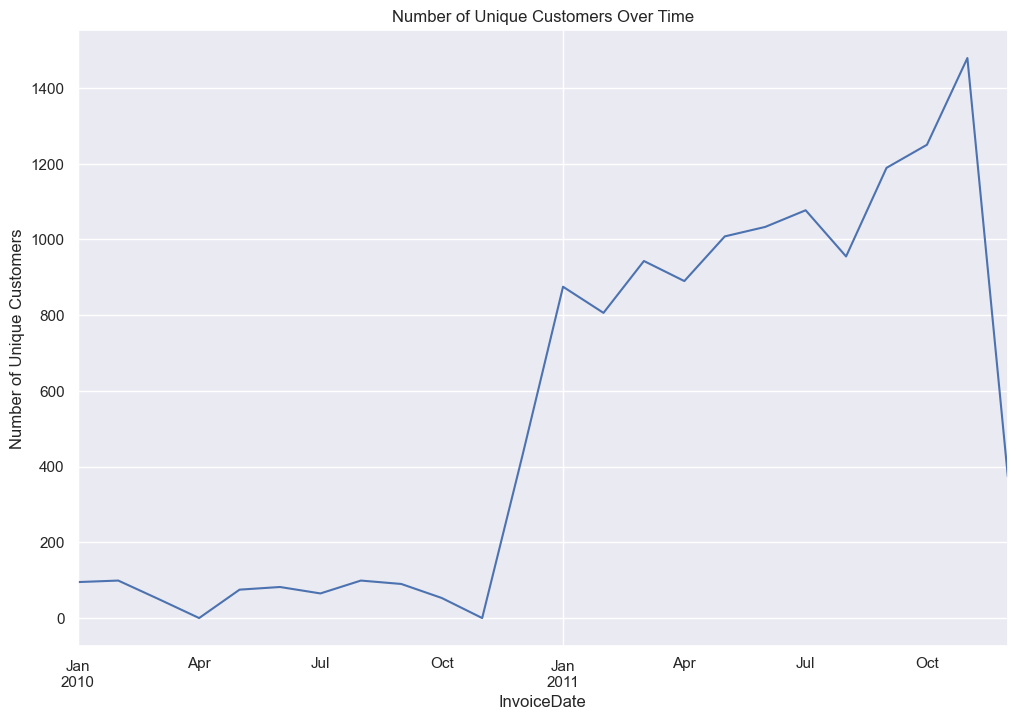

In [60]:
# total price = unit price * quantity
# Let's create a new column 'Total_Price' which will be the product of 'UnitPrice' and 'Quantity'
df['Total_Price'] = df['UnitPrice']*df['Quantity']
df['InvoiceDate'].max()
now =  dt.datetime(2011,12,31)
now = pd.to_datetime(now)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Let's create a RFM table
# Recency: How recently a customer has made a purchase
# Frequency: How often a customer makes a purchase
# Monetary: How much money a customer spends on purchases
# We will calculate these values for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate' : lambda day : (now - day.max()).days,
                               'InvoiceNo': lambda num : len(num),
                              'Total_Price': lambda price : price.sum()
                             
                             
                             })
col_list = ['Recency','Frequency','Monetary']
rfm.columns = col_list
rfm["R"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
rfm["F"] = pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])
rfm["M"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
rfm["RFM_Score"] = rfm["R"].astype(str) +rfm["F"].astype(str) + rfm["M"].astype(str)
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()
# group the segment according to the mean of the monetary value, recency and
# frequency
rfm['Monetary'] = rfm['Monetary'].astype(int)

rfm.groupby('Segment')['Monetary'].mean().sort_values()
rfm
# Let's plot the segments

plt.figure(figsize=(12,8))
sns.countplot(rfm['Segment'])
plt.title('Segments')
plt.show()

plt.Figure(figsize=(12,8))
# distribution of recency
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'], color='r')
plt.title('Distribution of Recency')
# distribution of frequency
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'], color='g')
plt.title('Distribution of Frequency')
# distribution of monetary
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'], color='b')
plt.title('Distribution of Monetary')
plt.tight_layout()
plt.show()


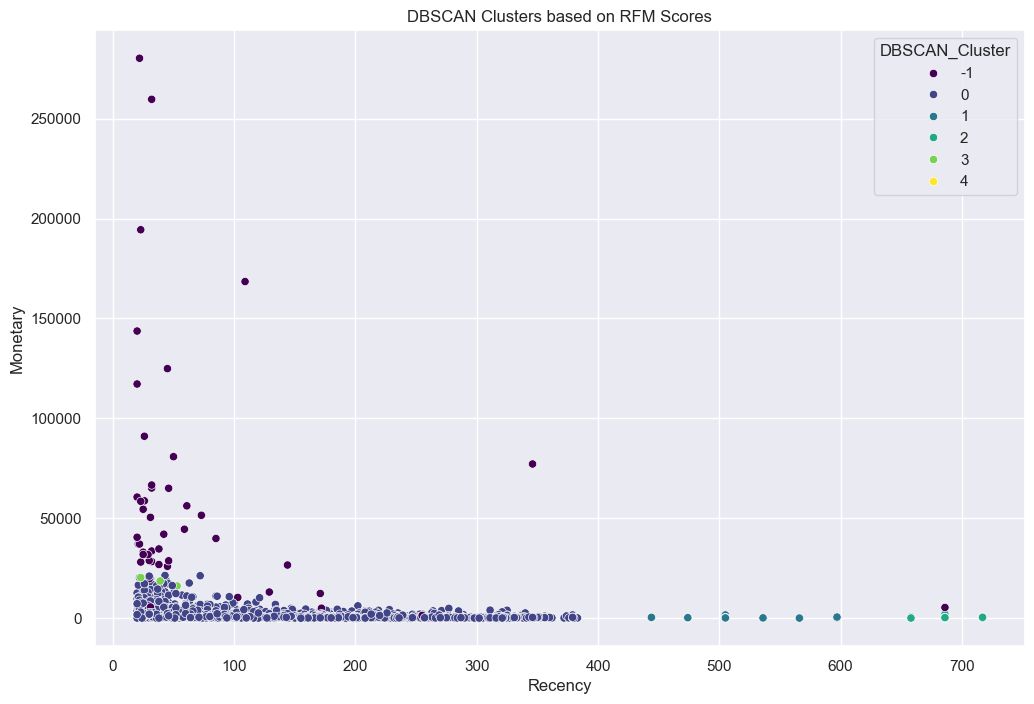

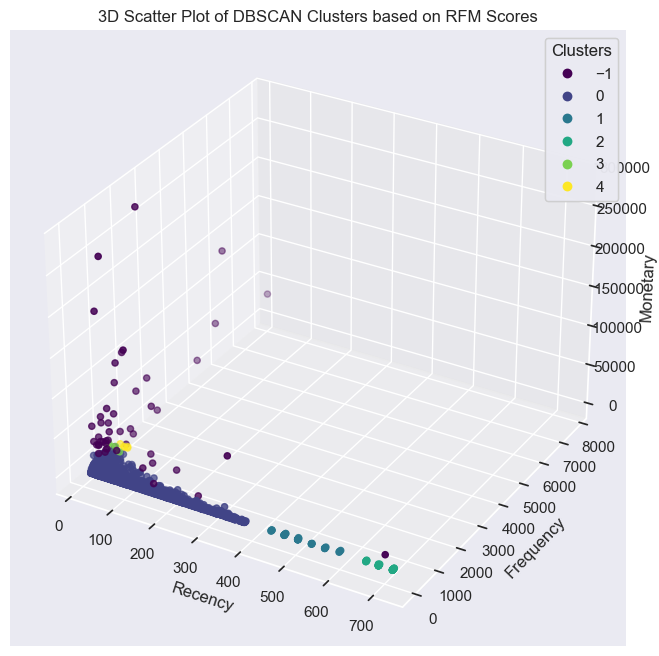

                   Recency           Frequency              Monetary           \
                      mean median         mean  median          mean   median   
DBSCAN_Cluster                                                                  
-1               69.940000   32.0  1058.560000   445.0  56923.160000  37141.5   
 0              117.353725   80.0    78.513449    41.0   1406.687455    674.0   
 1              506.538462  505.0    20.717949    12.0    279.717949    226.0   
 2              694.975000  686.0    19.075000    13.0    273.950000    231.0   
 3               36.250000   34.5   690.750000   707.5  17936.250000  17614.0   
 4               36.000000   36.0  1127.000000  1128.0   7166.000000   7975.0   

               Count  
               count  
DBSCAN_Cluster        
-1                50  
 0              4201  
 1                39  
 2                40  
 3                 4  
 4                 5  
Number of noise points: 50
            Recency  Frequency  Mone

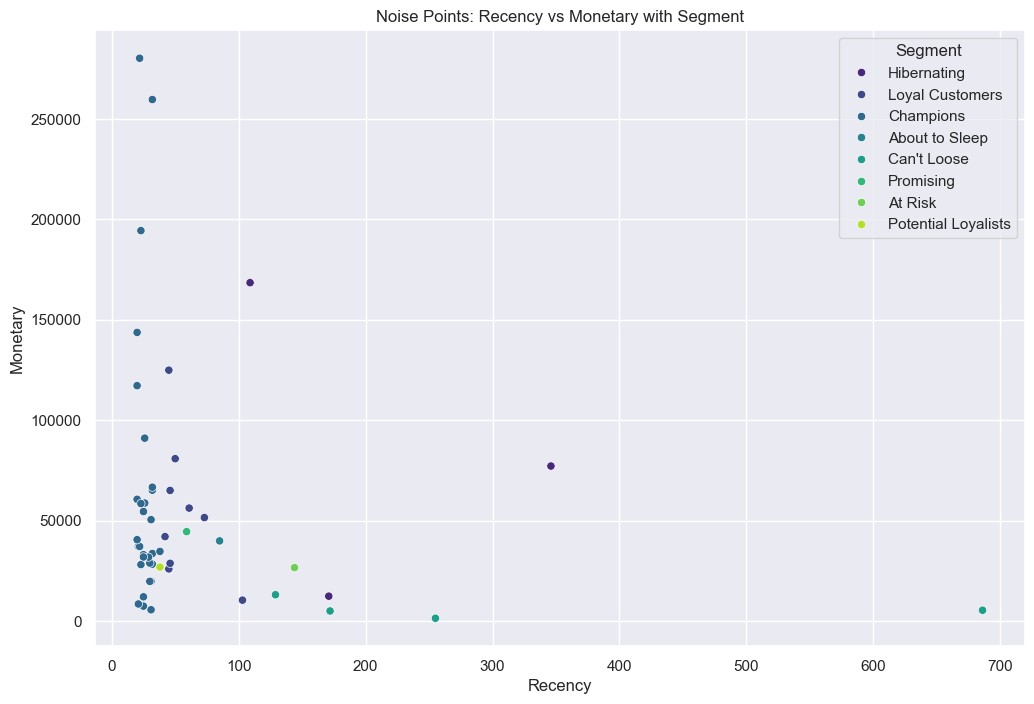

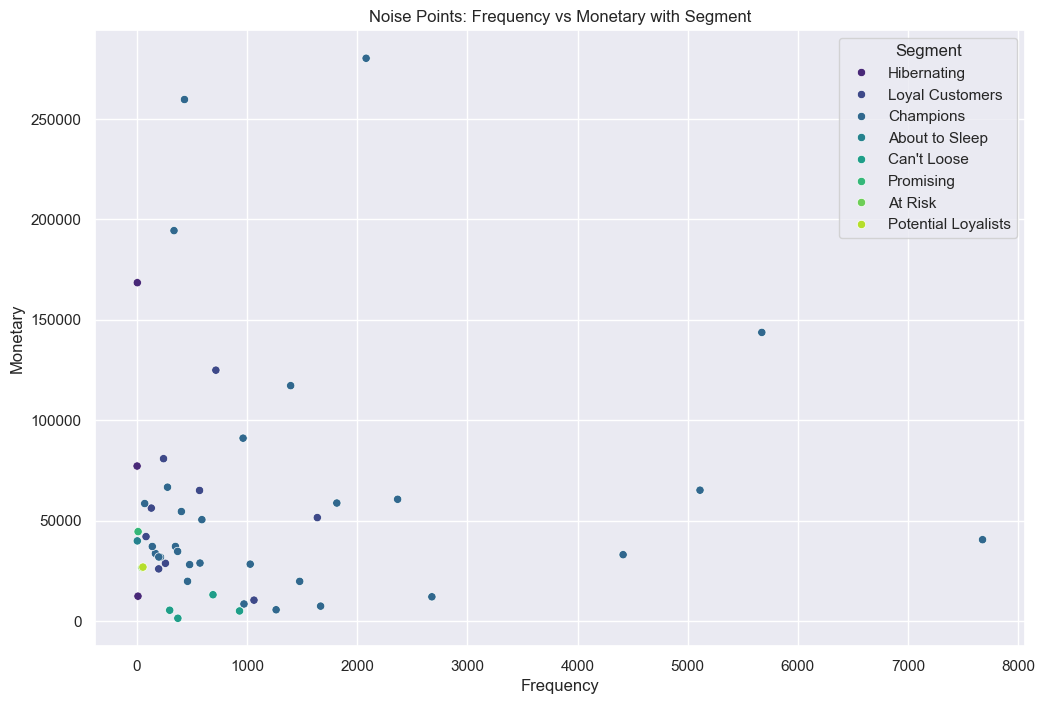

Customer 0:
Recency: 346
Frequency: 1
Monetary: 77183
RFM Score: 115
Segment: Hibernating
DBSCAN Cluster: -1
--------------------------------------------------


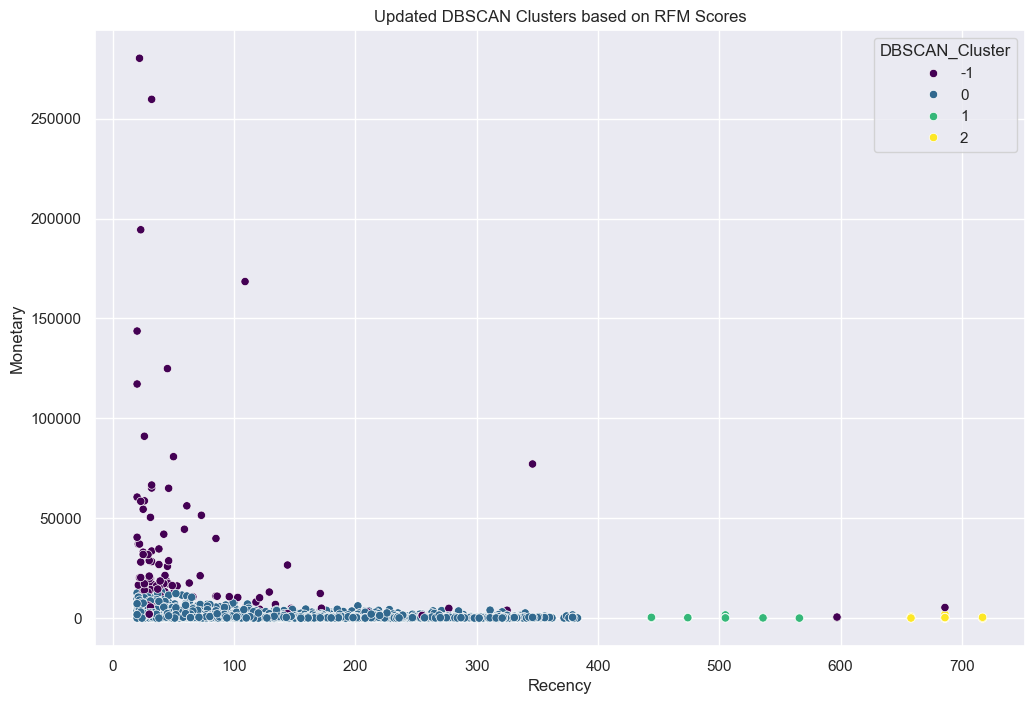

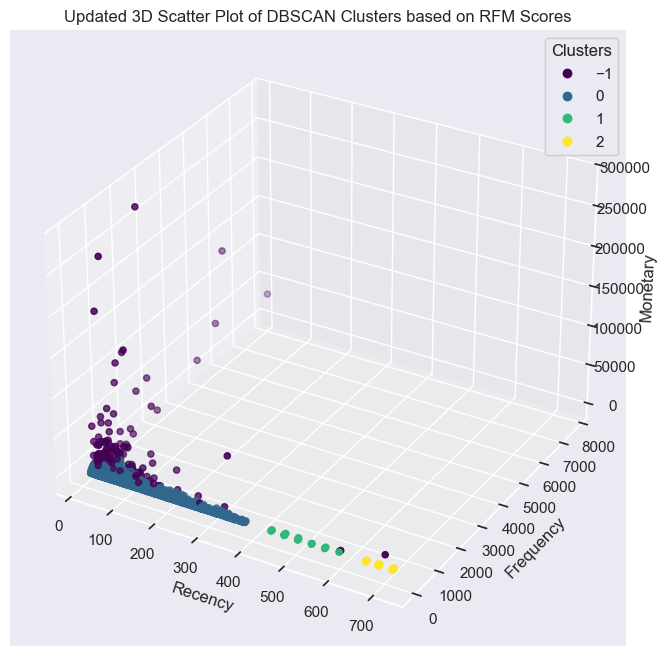

                   Recency          Frequency             Monetary           \
                      mean median        mean median          mean   median   
DBSCAN_Cluster                                                                
-1               72.928058   37.0  675.856115  421.0  26598.489209  13110.0   
 0              118.331797   81.0   72.121513   39.0   1253.206888    654.0   
 1              501.648649  505.0   18.054054   11.0    269.567568    201.0   
 2              694.975000  686.0   19.075000   13.0    273.950000    231.0   

               Count  
               count  
DBSCAN_Cluster        
-1               139  
 0              4123  
 1                37  
 2                40  
Customer 1:
Recency: 60
Frequency: 182
Monetary: 4310
RFM Score: 455
Segment: Loyal Customers
DBSCAN Cluster: 0
--------------------------------------------------


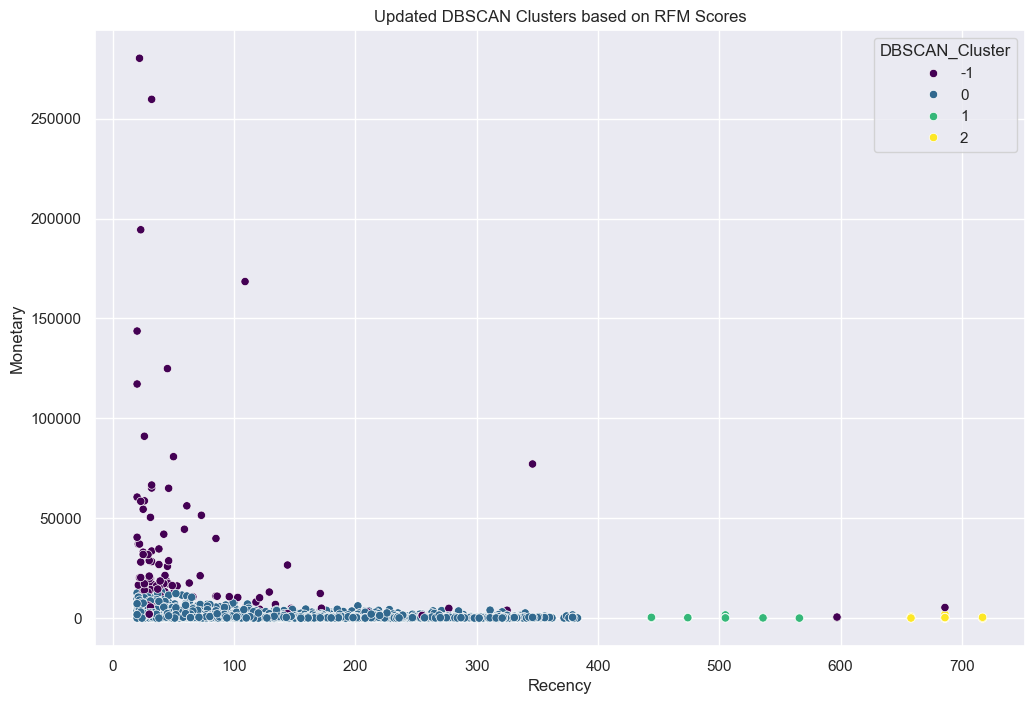

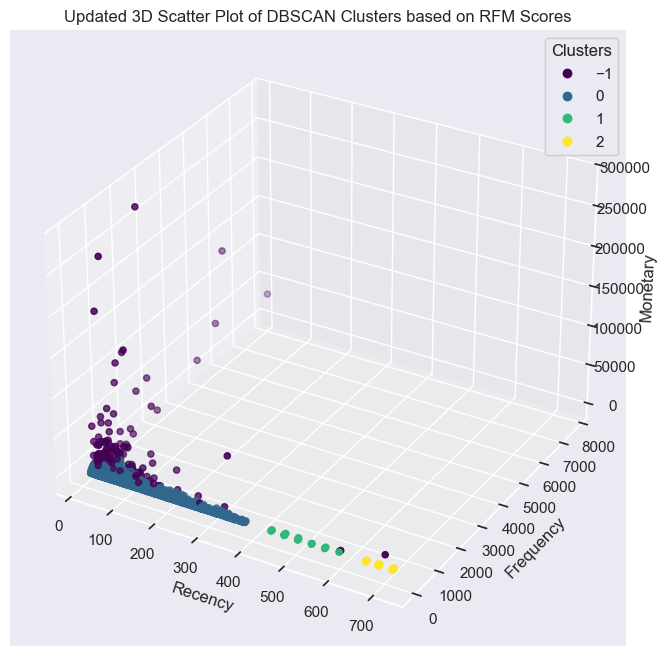

                   Recency          Frequency             Monetary           \
                      mean median        mean median          mean   median   
DBSCAN_Cluster                                                                
-1               72.928058   37.0  675.856115  421.0  26598.489209  13110.0   
 0              118.331797   81.0   72.121513   39.0   1253.206888    654.0   
 1              501.648649  505.0   18.054054   11.0    269.567568    201.0   
 2              694.975000  686.0   19.075000   13.0    273.950000    231.0   

               Count  
               count  
DBSCAN_Cluster        
-1               139  
 0              4123  
 1                37  
 2                40  
Customer 2:
Recency: 96
Frequency: 31
Monetary: 1797
RFM Score: 334
Segment: Need Attention
DBSCAN Cluster: 0
--------------------------------------------------


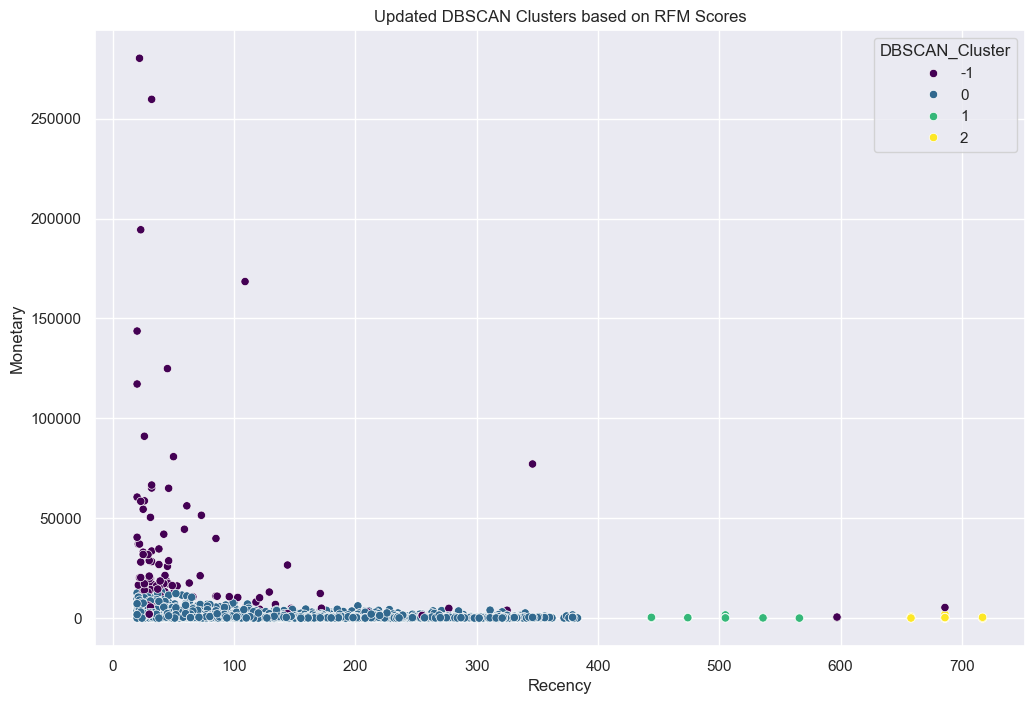

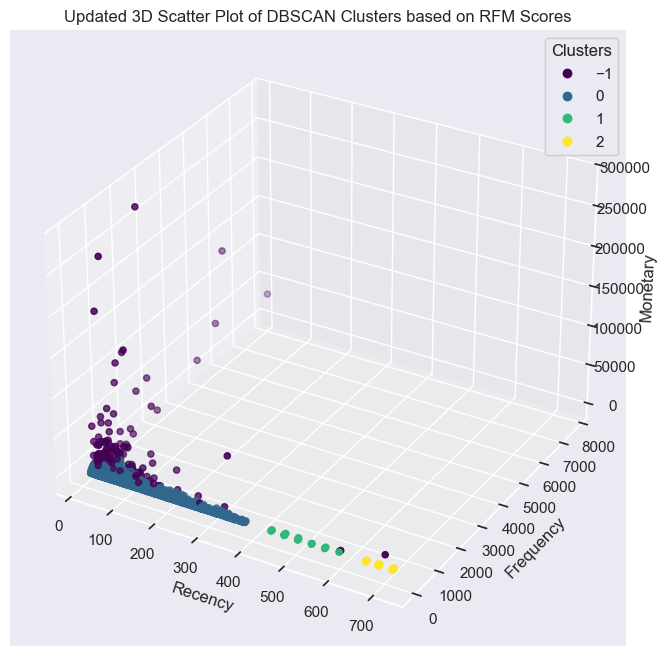

                   Recency          Frequency             Monetary           \
                      mean median        mean median          mean   median   
DBSCAN_Cluster                                                                
-1               72.928058   37.0  675.856115  421.0  26598.489209  13110.0   
 0              118.331797   81.0   72.121513   39.0   1253.206888    654.0   
 1              501.648649  505.0   18.054054   11.0    269.567568    201.0   
 2              694.975000  686.0   19.075000   13.0    273.950000    231.0   

               Count  
               count  
DBSCAN_Cluster        
-1               139  
 0              4123  
 1                37  
 2                40  
Customer 3:
Recency: 39
Frequency: 73
Monetary: 1757
RFM Score: 444
Segment: Loyal Customers
DBSCAN Cluster: 0
--------------------------------------------------


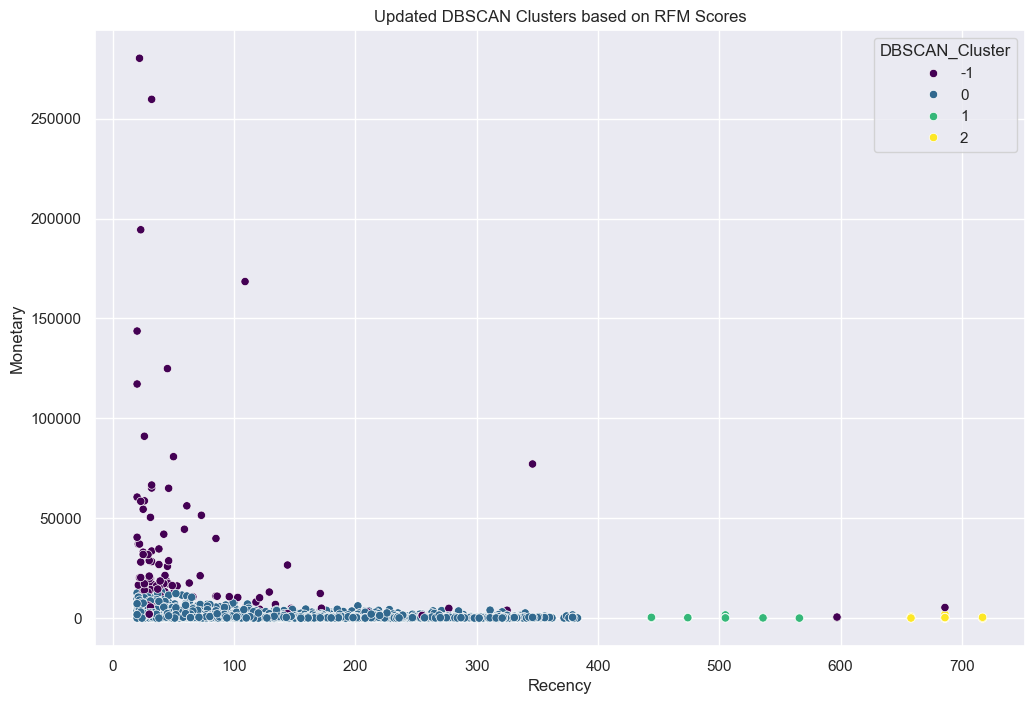

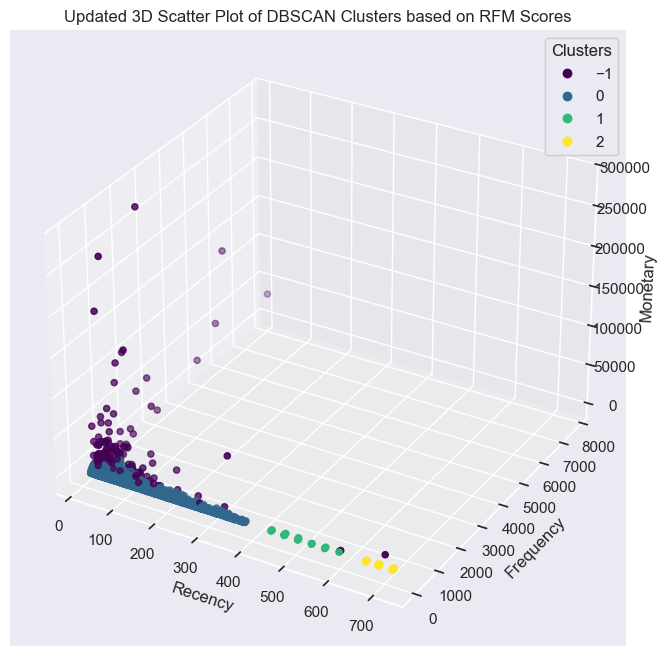

                   Recency          Frequency             Monetary           \
                      mean median        mean median          mean   median   
DBSCAN_Cluster                                                                
-1               72.928058   37.0  675.856115  421.0  26598.489209  13110.0   
 0              118.331797   81.0   72.121513   39.0   1253.206888    654.0   
 1              501.648649  505.0   18.054054   11.0    269.567568    201.0   
 2              694.975000  686.0   19.075000   13.0    273.950000    231.0   

               Count  
               count  
DBSCAN_Cluster        
-1               139  
 0              4123  
 1                37  
 2                40  
Customer 4:
Recency: 331
Frequency: 17
Monetary: 334
RFM Score: 122
Segment: Hibernating
DBSCAN Cluster: 0
--------------------------------------------------


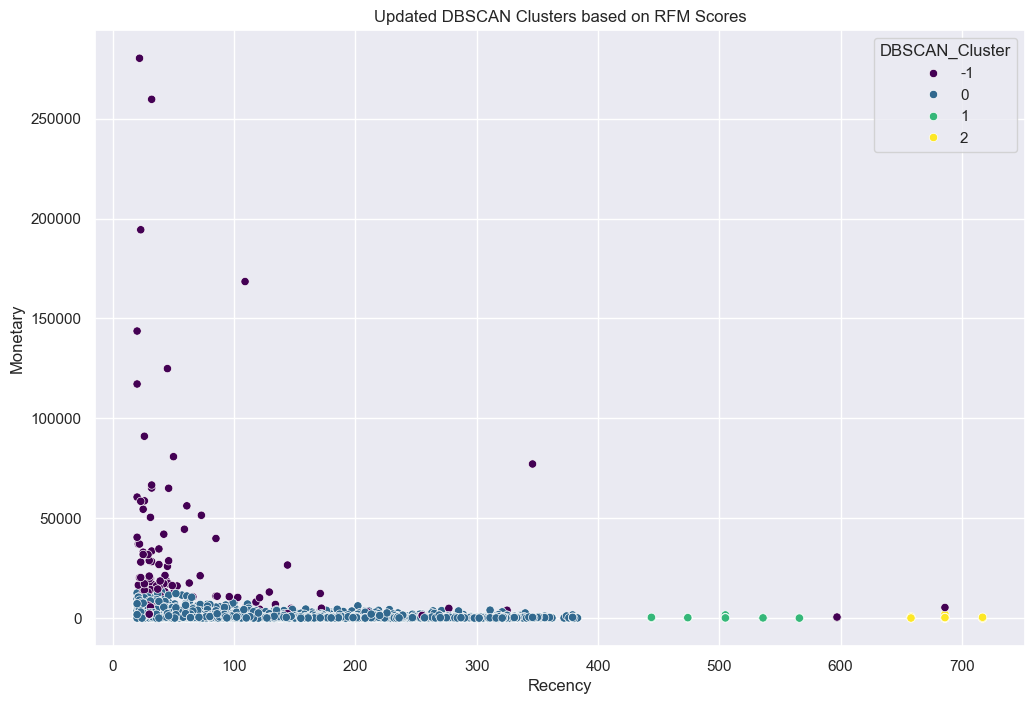

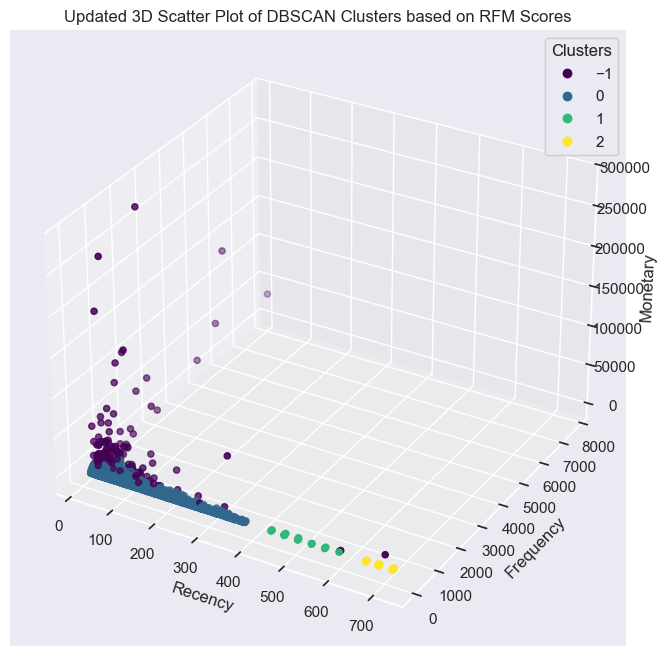

                   Recency          Frequency             Monetary           \
                      mean median        mean median          mean   median   
DBSCAN_Cluster                                                                
-1               72.928058   37.0  675.856115  421.0  26598.489209  13110.0   
 0              118.331797   81.0   72.121513   39.0   1253.206888    654.0   
 1              501.648649  505.0   18.054054   11.0    269.567568    201.0   
 2              694.975000  686.0   19.075000   13.0    273.950000    231.0   

               Count  
               count  
DBSCAN_Cluster        
-1               139  
 0              4123  
 1                37  
 2                40  


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Extracting the RFM values
rfm_values = rfm[['Recency', 'Frequency', 'Monetary']].values

# Standardizing the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_values)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Monetary', hue='DBSCAN_Cluster', data=rfm, palette='viridis')
plt.title('DBSCAN Clusters based on RFM Scores')
plt.show()
# Visualizing the clusters in 3D space

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['DBSCAN_Cluster'], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Scatter Plot of DBSCAN Clusters based on RFM Scores')
plt.show()

# Analyzing the clusters
rfm['CustomerID'] = rfm.index
cluster_summary = rfm.groupby('DBSCAN_Cluster').agg({
  'Recency': ['mean', 'median'],
  'Frequency': ['mean', 'median'],
  'Monetary': ['mean', 'median'],
  'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print(cluster_summary)

# Analyzing the -1 clusters
# -1 clusters in DBSCAN represent noise points that do not belong to any cluster
noise_points = rfm[rfm['DBSCAN_Cluster'] == -1]
print("Number of noise points:", len(noise_points))
print(noise_points.head())

# Analyzing why noise points include valuable customers
# Let's check the distribution of RFM scores for noise points
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Monetary', hue='Segment', data=noise_points, palette='viridis')
plt.title('Noise Points: Recency vs Monetary with Segment')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Frequency', y='Monetary', hue='Segment', data=noise_points, palette='viridis')
plt.title('Noise Points: Frequency vs Monetary with Segment')
plt.show()
# Analyzing specific customers
customers_to_analyze = [0, 1, 2, 3, 4]

for customer in customers_to_analyze:
  customer_data = rfm.iloc[customer]
  print(f"Customer {customer}:")
  print(f"Recency: {customer_data['Recency']}")
  print(f"Frequency: {customer_data['Frequency']}")
  print(f"Monetary: {customer_data['Monetary']}")
  print(f"RFM Score: {customer_data['RFM_Score']}")
  print(f"Segment: {customer_data['Segment']}")
  print(f"DBSCAN Cluster: {customer_data['DBSCAN_Cluster']}")
  print('-'*50)


  # Adjusting DBSCAN parameters to improve clustering accuracy
  dbscan = DBSCAN(eps=0.3, min_samples=100)
  rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

  # Visualizing the updated clusters
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x='Recency', y='Monetary', hue='DBSCAN_Cluster', data=rfm, palette='viridis')
  plt.title('Updated DBSCAN Clusters based on RFM Scores')
  plt.show()

  # Visualizing the updated clusters in 3D space
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['DBSCAN_Cluster'], cmap='viridis')
  legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
  ax.add_artist(legend1)
  ax.set_xlabel('Recency')
  ax.set_ylabel('Frequency')
  ax.set_zlabel('Monetary')
  plt.title('Updated 3D Scatter Plot of DBSCAN Clusters based on RFM Scores')
  plt.show()

  # Analyzing the updated clusters
  cluster_summary = rfm.groupby('DBSCAN_Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median'],
    'CustomerID': 'count'
  }).rename(columns={'CustomerID': 'Count'})

  print(cluster_summary)




## Detailed Analysis with Respect to RFM

### Introduction
RFM (Recency, Frequency, Monetary) analysis is a marketing technique used to quantify and evaluate customer value. It helps in segmenting customers based on their purchasing behavior. The RFM model is based on three quantitative factors:
- **Recency (R):** How recently a customer made a purchase.
- **Frequency (F):** How often a customer makes a purchase.
- **Monetary (M):** How much money a customer spends on purchases.

### RFM Segmentation
In this analysis, we have calculated the RFM values for each customer and segmented them into different categories based on their RFM scores. The segments are defined as follows:
- **Hibernating:** Customers who have not purchased recently and have low frequency and monetary values.
- **At Risk:** Customers who have not purchased recently but have moderate frequency and monetary values.
- **Can't Lose:** Customers who have not purchased recently but have high monetary values.
- **About to Sleep:** Customers who have not purchased recently and have low frequency values.
- **Need Attention:** Customers who have moderate recency, frequency, and monetary values.
- **Loyal Customers:** Customers who have high frequency and monetary values.
- **Promising:** New customers who have made recent purchases.
- **New Customers:** Customers who have made their first purchase recently.
- **Potential Loyalists:** Customers who have made recent purchases and have moderate frequency and monetary values.
- **Champions:** Customers who have made recent purchases and have high frequency and monetary values.

### RFM Table
The RFM table is created by aggregating the data for each customer and calculating the recency, frequency, and monetary values. The RFM scores are then calculated by binning these values into quintiles.

### Segmentation Analysis
The segments are analyzed based on the average monetary value, recency, and frequency for each segment. This helps in understanding the behavior of different customer segments and tailoring marketing strategies accordingly.

### Visualizations
Several visualizations are created to provide deeper insights into the RFM analysis:
- **Distribution of RFM Scores:** This plot shows the distribution of RFM scores across all customers.
- **Average Monetary Value by Segment:** This bar plot shows the average monetary value for each segment.
- **Average Recency by Segment:** This bar plot shows the average recency for each segment.
- **Average Frequency by Segment:** This bar plot shows the average frequency for each segment.
- **Total Sales Over Time:** This line plot shows the total sales over time.
- **Number of Unique Customers Over Time:** This line plot shows the number of unique customers over time.

### Conclusion
RFM analysis provides valuable insights into customer behavior and helps in identifying key customer segments. By understanding the characteristics of each segment, businesses can develop targeted marketing strategies to improve customer retention and increase sales.
